# Simple Solution for the Fashion MNIST

This solution follows [NNFS](https://nnfs.io) but using PyTorch.

The objective is to identify different types of clothing items. The following lables were assigned to different items of clothing:

| Image Group | Class Label |
| ----------- | ----------- |
| 0           | T-shirt/top |
| 1           | Trouser     |
| 2           | Pullover    |
| 3           | Dress       |
| 4           | Coat        |
| 5           | Sandal      |
| 6           | Shirt       |
| 7           | Sneaker     |
| 8           | Bag         |
| 9           | Ankle boot  |

Here is a sample of the first item in the dataset:

In [32]:
import warnings; warnings.filterwarnings('ignore')
import importlib
from IPython.display import Image
import preprocessing; importlib.reload(preprocessing)

preprocessing.download()
Image(filename=f"{preprocessing.LOCATION}/extracted/test/0/0000.png", width="100px") 

Skipping https://nnfs.io/datasets/fashion_mnist_images.zip as data/fashion_mnist_images/fashion_mnist_images.zip already exists!
Extracting...
Complete.


## Solution

In [2]:
"""
Load Dataset
"""
import importlib
import preprocessing; importlib.reload(preprocessing)

train_imgs = preprocessing.load_dataset(f"{preprocessing.LOCATION}/extracted/train")
test_imgs = preprocessing.load_dataset(f"{preprocessing.LOCATION}/extracted/test")

In [3]:
"""
Preview dataset
"""
train_sample = train_imgs[100]
print(f"Train Data Set:\n\tSize: {len(train_imgs)}\n\tShape: {train_sample.img_tensor.shape}\n\tSample Image:")
test_sample = test_imgs[100]
print(f"Test Data Set:\n\tSize: {len(test_imgs)}\n\tShape: {test_sample.img_tensor.shape}\n\tSample Image: ")

Train Data Set:
	Size: 60000
	Shape: torch.Size([1, 784])
	Sample Image:
Test Data Set:
	Size: 10000
	Shape: torch.Size([1, 784])
	Sample Image: 


In [12]:
"""
Train Model
"""
import importlib
import random
import torch

import nn_models; importlib.reload(nn_models)

EPOCH = 20
BATCH_SIZE = 128
OPTIMISER_LEARNING_RATE = 1e-3 
OPTIMISER_WEIGHT_DECAY = 1e-3
OPTIMISER_EPS = 1e-7

random.shuffle(train_imgs)

simple_model = nn_models.SimpleModel()
optimizer = torch.optim.Adam(
  simple_model.parameters(),
  weight_decay=OPTIMISER_WEIGHT_DECAY,
  lr=OPTIMISER_LEARNING_RATE,
  eps=OPTIMISER_EPS)
loss_func = torch.nn.functional.cross_entropy

def generate_batches(imgs, batch_size=BATCH_SIZE):
    batches = torch.concat([v.img_tensor for v in imgs], dim=0) 
    target = torch.tensor([v.classification for v in imgs])
    return list(zip(torch.split(batches, batch_size), torch.split(target, batch_size)))

def train(model: torch.nn.Module, train_data: list[tuple[torch.tensor, torch.tensor]], epoch: int = None, print_step = None):
    epoch_string = f" Epoch: {epoch}," if epoch else ""
    model.train()

    total_loss, total_acc = 0.0, 0.0

    for step, (data, target) in enumerate(train_data, start=1):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()
        acc = torch.sum(output.argmax(dim=1) == target)/len(data) 
        total_loss += loss
        total_acc += acc
        if print_step and step % print_step == 0: print(f"Test step:{epoch_string} Step: {step}, sLoss: {loss}, sAcc: {acc}, aLoss: {total_loss/step}, aAcc: {total_acc/step}")
        
    total_loss /= len(train_data)
    total_acc /= len(train_data)

    print(f"Train set:{epoch_string} Loss: {total_loss}, Acc: {total_acc}")

def eval(model: torch.nn.Module, test_data: list[tuple[torch.tensor, torch.tensor]]):
    model.eval()

    loss, acc = 0.0, 0.0

    for step, (data, target) in enumerate(test_data):
        output = model(data)
        loss += loss_func(output, target)
        acc += torch.sum(output.argmax(dim=1) == target)/len(data)

    loss /= len(test_data)
    acc /= len(test_data)

    print(f"Test set: Average loss: {loss}, Acc: {acc}")

train_data = generate_batches(train_imgs)
test_data = generate_batches(test_imgs)

for epoch in range(1, EPOCH+1):
    train(simple_model, train_data, epoch=epoch)

eval(simple_model, train_data)
eval(simple_model, test_data)

Train set: Epoch: 1, Loss: 0.5471644997596741, Acc: 0.8046042323112488
Train set: Epoch: 2, Loss: 0.3983995020389557, Acc: 0.8546441793441772
Train set: Epoch: 3, Loss: 0.3647709786891937, Acc: 0.8670653700828552
Train set: Epoch: 4, Loss: 0.34430649876594543, Acc: 0.8734119534492493
Train set: Epoch: 5, Loss: 0.33010387420654297, Acc: 0.8780428171157837
Train set: Epoch: 6, Loss: 0.3188953995704651, Acc: 0.8825792670249939
Train set: Epoch: 7, Loss: 0.3081068992614746, Acc: 0.886532723903656
Train set: Epoch: 8, Loss: 0.2985742688179016, Acc: 0.890397310256958
Train set: Epoch: 9, Loss: 0.29186344146728516, Acc: 0.8928071856498718
Train set: Epoch: 10, Loss: 0.2848723530769348, Acc: 0.8953113555908203
Train set: Epoch: 11, Loss: 0.2789927124977112, Acc: 0.8978766798973083
Train set: Epoch: 12, Loss: 0.2736940085887909, Acc: 0.8997368216514587
Train set: Epoch: 13, Loss: 0.2695993185043335, Acc: 0.9013581275939941
Train set: Epoch: 14, Loss: 0.26468968391418457, Acc: 0.9030795097351074

Infr: img: 0507.png, actual class: Sandal, predicted class: Sandal, confidence: 97.7142562866211, path: ./data/fashion_mnist_images/extracted/test/5/0507.png


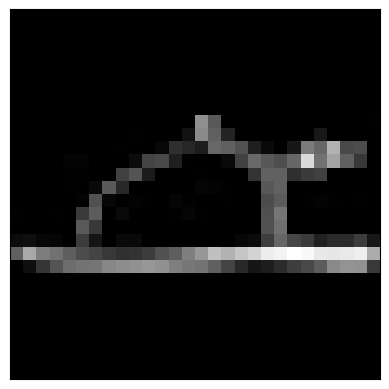

In [50]:
""" 
Test random sample
"""
import random
import fashion_mnist_image_class; importlib.reload(fashion_mnist_image_class)

CLASSES = { 0 : "T-shirt/top", 1 : "Trouser", 2 : "Pullover", 3 : "Dress", 4 : "Coat", 5 : "Sandal", 6 : "Shirt", 7 : "Sneaker", 8 : "Bag", 9 : "Ankle boot" }

def infr(model: torch.nn.Module, sample: tuple[torch.tensor]):
    model.eval()
    output = torch.nn.functional.softmax(model(sample))
    pred = int(output.argmax())
    conf = float(output[0][pred]*100)
    return (pred, conf) 

sample = random.sample(test_imgs, 1)[0]
prediction, confidence = infr(simple_model, sample.img_tensor);
print(f"Infr: img: {sample.name}, actual class: {CLASSES[sample.classification]}, predicted class: {CLASSES[prediction]}, confidence: {confidence}, path: ./{sample.path}/{sample.name}")
sample.draw()

Infr: img: 0898.png, actual class: Pullover, predicted class: Coat, confidence: 52.25482177734375, path: ./data/fashion_mnist_images/extracted/test/2/0898.png


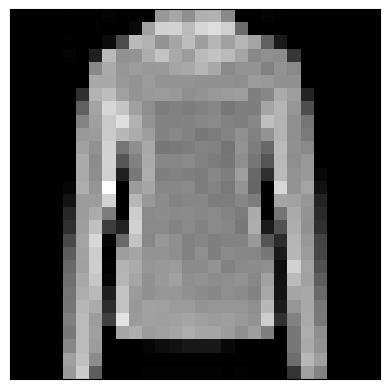

In [47]:
""" 
Inspect incorrect prediction
"""
random.shuffle(test_imgs)
for img in test_imgs:
    prediction, confidence = infr(simple_model, img.img_tensor);
    if img.classification != prediction:
        break

print(f"Infr: img: {img.name}, actual class: {CLASSES[img.classification]}, predicted class: {CLASSES[prediction]}, confidence: {confidence}, path: ./{img.path}/{img.name}")
img.draw()

Infr: img: tshirt.png, actual class: T-shirt/top, predicted class: T-shirt/top, confidence: 97.96820831298828, path: ./data/fashion_mnist_images/tshirt.png


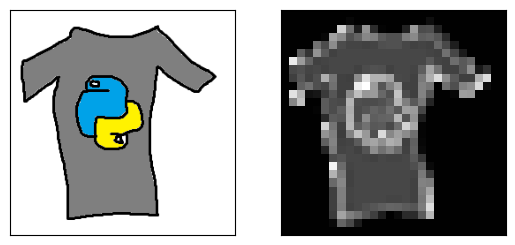

In [35]:
""" 
Test out of dataset T-Shirt
"""
import importlib
import torchvision
import preprocessing; importlib.reload(preprocessing)
import fashion_mnist_image_class; importlib.reload(fashion_mnist_image_class)

NNFS_DATASET_PATH = "https://nnfs.io/datasets"

T_to_PIL = torchvision.transforms.ToPILImage()
T_from_PIL = torchvision.transforms.ToTensor()

def process_custom_image(img):
    b = ((1-(T_from_PIL(T_to_PIL(img).convert('L').resize((28,28))))))
    m = b.max()/2
    b = (b-m)/m
    return b.flatten()[None, :]

def infrance_custom_image(name, classification):
    preprocessing.download_img(NNFS_DATASET_PATH, name)
    sample = fashion_mnist_image_class.FashionMnistImageTensor(name, preprocessing.LOCATION, classification)
    sample.img_tensor = process_custom_image(sample.raw_img_tensor)
    prediction, confidence = infr(simple_model, sample.img_tensor)
    print(f"Infr: img: {sample.name}, actual class: {CLASSES[sample.classification]}, predicted class: {CLASSES[prediction]}, confidence: {confidence}, path: ./{sample.path}/{sample.name}")
    fashion_mnist_image_class.FashionMnistImageTensor.draw_many([sample.raw_img_tensor, sample.img_tensor.resize(1, 28, 28)])

infrance_custom_image("tshirt.png", 0)

Infr: img: pants.png, actual class: Trouser, predicted class: Trouser, confidence: 98.49142456054688, path: ./data/fashion_mnist_images/pants.png


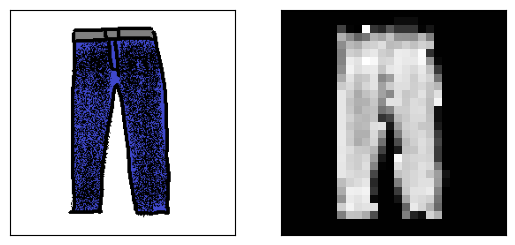

In [36]:
""" 
Test out of data pants
"""
infrance_custom_image("pants.png", 1)